# Body Parts


  ### 3.	Which parts of human body are more prone to be injured in such accidents

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
bodyParts = '''abdomen
Adam's apple
adenoids
adrenal gland
anatomy
ankle
anus
appendix
arch
arm
artery
back
ball of the foot
belly
belly button
big toe
bladder
blood
blood vessels
body
bone
brain
breast
buttocks
calf
capillary
carpal
cartilage
cell
cervical vertebrae
cheek
chest
chin
circulatory system
clavicle
coccyx
collar bone
diaphragm
digestive system
ear
ear lobe
elbow
E cont.
endocrine system
esophagus
eye
eyebrow
eyelashes
eyelid
face
fallopian tubes
feet
femur
fibula
filling
finger
fingernail
follicle
foot
forehead
gallbladder
glands
groin
gums
hair
hand
head
heart
heel
hip
humerus
immune system
instep
index finger
intestines
iris
jaw
kidney
knee
larynx
leg
ligament
lip
liver
lobe
lumbar vertebrae
lungs
lymph node
mandible
metacarpal
metatarsal
molar
mouth
muscle
nail
navel
neck
nerves
nipple
nose
nostril
organs
ovary
palm
pancreas
patella
pelvis
phalanges
pharynx
pinky
pituitary
pore
pupil
radius
rectum
red blood cells
respiratory system
ribs
sacrum
scalp
scapula
senses
shin
shoulder
shoulder blade
skeleton
skin
skull
sole
spinal column
spinal cord
spine
spleen
sternum
stomach
tarsal
teeth
tendon
testes
thigh
thorax
throat
thumb
thyroid
tibia
tissue
toe
toenail
tongue
tonsils
tooth
torso
trachea
ulna
ureter
urethra
urinary system
uterus
uvula
vein
vertebra
waist
white blood cells
wrist'''.split('\n')

In [5]:
baseDir = './Text Mining/data/interim/'

# Assign spreadsheet filename to `file`
# Load spreadsheet
xl = pd.ExcelFile(baseDir+'MsiaAccidentCases.xlsx')

# Print the sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
#miaCaseDf = xl.parse('MsiaAccidentCases-cleaned')
miaCaseDf = pd.read_excel(baseDir+'MsiaAccidentCases.xlsx')
miaCaseDf.head()

['MsiaAccidentCases-cleaned', 'Sheet2', 'Sheet1']


,Cause,Title Case,Summary Case
0,Caught in/between Objects,Died being caught in between machines,The accident occurred as victim was assigned t...
1,Other,Died been buried,The accident occurred during the floor concret...
2,Struck By Moving Objects,Died crushed by entrance arch,Victim with four co-workers were installing wo...
3,Collapse of object,Died due to mine cave-in,A series of avalanche trapped victim who was m...
4,Struck By Moving Objects,Died being run over by a lorry,Accident involving an employee who has been ru...


In [7]:
miaCaseDf.columns # .describe() #.groupby('Cause')  #.describe()

Index(['Cause ', 'Title Case', 'Summary Case'], dtype='object')

In [6]:
miaCaseDf.groupby('Cause ').describe()

Summary Case        \
                                        count  freq   
Cause                                                 
Caught in/between Objects                  46     1   
Collapse of object                          9     1   
Drowning                                    9     1   
Electrocution                              17     1   
Exposure to Chemical Substances             2     1   
Exposure to extreme temperatures            3     1   
Falls                                      73     1   
Fires and Explosion                         4     1   
Other                                      16     1   
Others                                      1     1   
Struck By Moving Objects                   52     1   
Suffocation                                 3     1   
TEST DATA                                   0  None   

                                                                                     \
                                                                                top   
Cause                                                                                 
Caught in/between Objects         The incident happened at around 10.15 am at a ...   
Collapse of object                Three workers died after being struck by concr...   
Drowning                          Victims carry out land clearing work using bul...   
Electrocution                     The victim may have suffered electrocution whi...   
Exposure to Chemical Substances   Victim was diagnosed with organophosphorus as ...   
Exposure to extreme temperatures  The victim who was assigned to perform work of...   
Falls                             At approximately 6.45pm, the 4 year old victim...   
Fires and Explosion                   Three workers were died due to coal explosion   
Other                             Victim caught in the cage after the sky lift o...   
Others                                       A worker has been stung by wasps while   
Struck By Moving Objects          The victim, 21, was killed after a bulldozer t...   
Suffocation                       2 victims died after inhaling toxic gas while ...   
TEST DATA                                                                      None   

                                        Title Case        \
                                 unique      count  freq   
Cause                                                      
Caught in/between Objects            46         46     2   
Collapse of object                    9          9     1   
Drowning                              9          9     6   
Electrocution                        17         17     4   
Exposure to Chemical Substances       2          2     1   
Exposure to extreme temperatures      3          3     1   
Falls                                73         73    35   
Fires and Explosion                   4          4     1   
Other                                16         16     2   
Others                                1          1     1   
Struck By Moving Objects             52         52     2   
Suffocation                           3          3     1   
TEST DATA                             0          0  None   

                                                                          \
                                                                     top   
Cause                                                                      
Caught in/between Objects                         Died crushed by timber   
Collapse of object                Collapse of Reinforced Concrete Coping   
Drowning                                            Died due to drowning   
Electrocution                                  Died due to electrocution   
Exposure to Chemical Substances            Died by insecticide poisoning   
Exposure to extreme temperatures      Died due to contact with hot water   
Falls                                           Died falling from height   
Fires and Explosion                  D

### Extract boby part information for each accident

In [ ]:
# Assign spreadsheet filename to `file`
# Load spreadsheet
xl = pd.ExcelFile(baseDir+'osha.xlsx')

# Load a sheet into a DataFrame by name: df1
oshaDf = xl.parse('out_title', header=None, names = ['item','event',"details",'severity', "Hospitalization"])

In [45]:
oshaDf1=pd.read_csv('osha1.csv', index_col='Case')
oshaDf1.head()

,Title,Description,Summary,Classification,Cause,Fatal
Case,,,,,,
201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,burn industrial truck waste proc fac pa...,,Exposure to extreme temperatures,False
202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,truck flatbed truck trailer fall abdomen,,Struck By Moving Objects,True
200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,construction undrgrd power line highway ...,1 317290559 Fatality Other Occupation not re...,Struck By Moving Objects,True
200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,waste proc fac industrial truck struck b...,,Struck By Moving Objects,True
201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,truck driver pump tank hot water struc...,,Exposure to extreme temperatures,False


In [65]:
oshaDf1.shape

(16323, 6)

In [46]:

newstopwords=stopwords.words("English") + ['the','is','it','may'] 
    #+ ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']
    
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    tokens = word_tokenize(text)
    post = pos_tag(tokens, tagset='universal')
    #print(post)
    #post = [p for p in post if p not in newstopwords]
    
    newTxt = []
    for it in post:        
        if it[1] == 'NOUN':
            tmp = WNlemma.lemmatize(it[0], pos = 'n')
        elif it[1] == 'VERB':
            tmp = WNlemma.lemmatize(it[0], pos = 'v')
        elif it[1] == 'ADJ':
            tmp = it[0]
        else:
            #tmp = it[0]
            continue
        
        newTxt.append(tmp.lower())

    #tokens = [t.lower() for t in tokens if t not in newstopwords]
    
    #tokens=[WNlemma.lemmatize(t) for t in tokens]  # WNlemma.lemmatize('approves', pos='v')
    #tokens=[word for word in tokens if word not in newstopwords]

    return newTxt # [t.lower() for t in newTxt if t not in newstopwords]


In [47]:
oshaData = {}

#'item','event',"details",'severity', "Hospitalization"
for index, row in oshaDf1.iterrows():
    tmp = pre_process("{}. {}. {}. {}".format(row['Title'], row['Description'], row['Summary'], row['Classification'])) # 

    oshaData[index] = tmp

In [48]:

def determineBodyPart(text):
    tmp = []    
    for b in bodyParts:
        tmp += [t for t in text if t == b]
        
    return set(tmp)
    

In [49]:
columns = ['index','bodypart']
oshaBodyPart = {}

for index, text in oshaData.items():
    oshaBodyPart[index] = determineBodyPart(text)
    

In [13]:
oshaBodyParts = pd.DataFrame([(idx, ' '.join(tmp)) for (idx, tmp) in oshaBodyPart.items()], columns=['id', 'bodyparts'])
oshaBodyParts.head(10)

,id,bodyparts
0,201079928,abdomen groin back leg foot
1,202561825,abdomen
2,200361855,abdomen
3,200361863,head abdomen blood back leg torso face
4,201079324,abdomen shoulder leg
5,202658258,chest abdomen arm
6,202685947,abdomen
7,202673471,abdomen
8,202369575,abdomen
9,202509832,abdomen


In [50]:
combined = pd.read_csv('osha1.csv')

In [51]:

combined['bodypart'] = oshaBodyParts['bodyparts']

In [52]:
combined.head()

,Case,Title,Description,Summary,Classification,Cause,Fatal,bodypart
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,burn industrial truck waste proc fac pa...,,Exposure to extreme temperatures,False,abdomen groin back leg foot
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,truck flatbed truck trailer fall abdomen,,Struck By Moving Objects,True,abdomen
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,construction undrgrd power line highway ...,1 317290559 Fatality Other Occupation not re...,Struck By Moving Objects,True,abdomen
3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,waste proc fac industrial truck struck b...,,Struck By Moving Objects,True,head abdomen blood back leg torso face
4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,truck driver pump tank hot water struc...,,Exposure to extreme temperatures,False,abdomen shoulder leg


### main body parts injured for each kind of accident

## Summary tables

In [53]:
#split column Message to new df, create Serie by stack
s = (combined.bodypart.str.split(expand=True).stack())
#remove multiindex
s.index = s.index.droplevel(-1)
s.name = 'bodyparts'

#join Serie s to df source
summary = (combined.join(s))

In [56]:
dfSummary = summary.groupby(['Cause', 'bodyparts']).size().reset_index(name='count')
dfSummary.head()

,Cause,bodyparts,count
0,Caught in/between Objects,abdomen,25
1,Caught in/between Objects,ankle,38
2,Caught in/between Objects,arch,2
3,Caught in/between Objects,arm,250
4,Caught in/between Objects,artery,8


In [59]:
dfSummary = summary.groupby(['bodyparts']).size().reset_index(name='Count')
dfSummary.head()

,bodyparts,Count
0,abdomen,215
1,ankle,342
2,arch,17
3,arm,1380
4,artery,57


In [60]:
dfSummary.sort_values(by='Count', ascending=False, inplace=True)
total = dfSummary['Count'].sum()
dfSummary['Percentage'] = (dfSummary['Count']/total)*100
dfSummary.head()

,bodyparts,Count,Percentage
41,hand,3019,11.788824
37,foot,2682,10.472881
42,head,2250,8.785974
35,finger,1936,7.559842
5,back,1596,6.232184


In [64]:
total

25609

### visualisation

In [23]:
def parseCause(cause):
    print('\nFor cause: ' + cause)
    tmpDf = combined.loc[combined['Cause'] == cause]

    bps = []
    for bp in tmpDf['bodypart']:
        if(bp == None or str(bp) == 'nan'):
            continue

        tmp = word_tokenize(bp)
        bps += tmp
    
    fd = nltk.FreqDist(bps)
    fd.most_common(25)
    fd.plot(25)
    
    wc = WordCloud(background_color="white").generate(' '.join(bps))

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


For cause: Caught in/between Objects


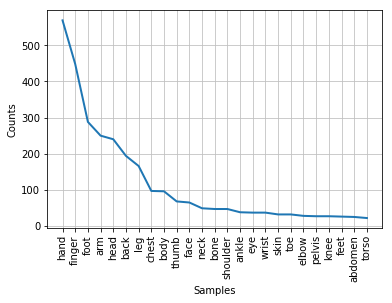

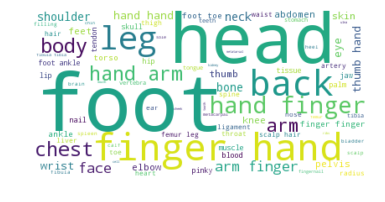


For cause: Collapse of object


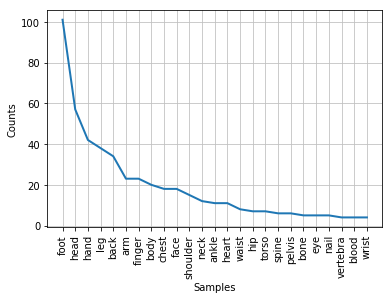

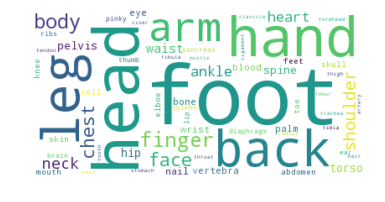


For cause: Drowning


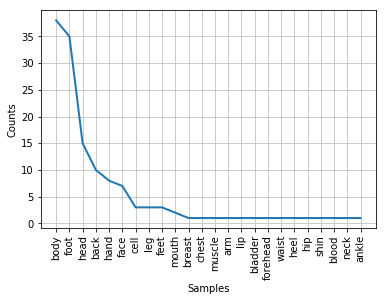

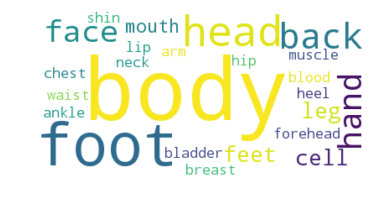


For cause: Electrocution


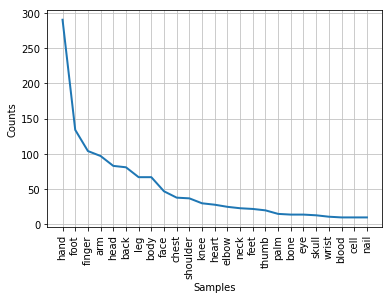

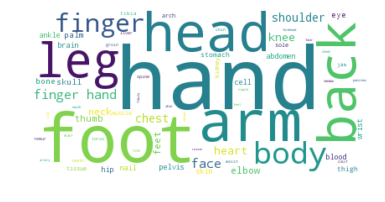


For cause: Exposure to Chemical Substances


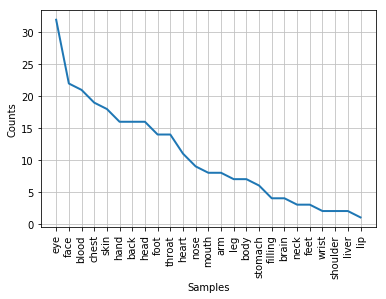

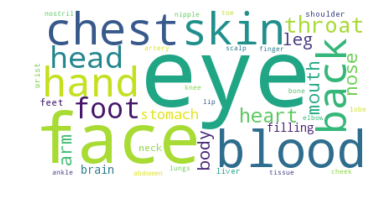


For cause: Exposure to extreme temperatures


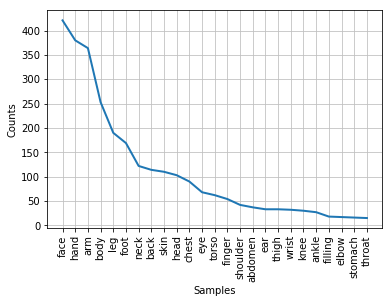

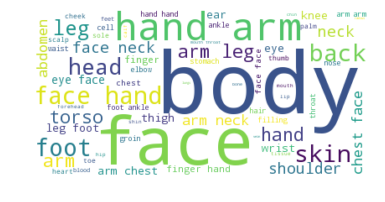


For cause: Falls


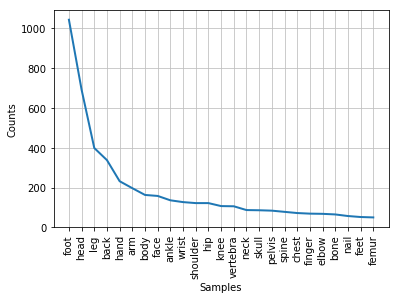

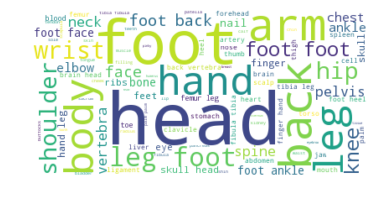


For cause: Fires and Explosion


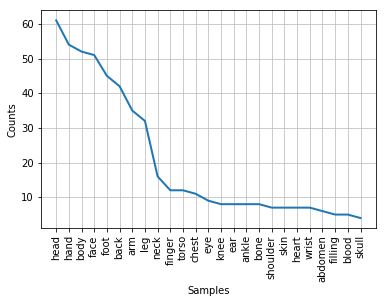

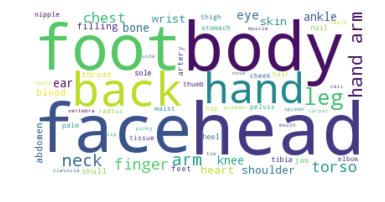


For cause: Other


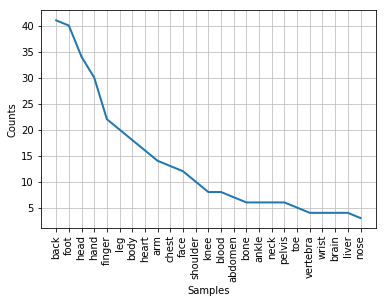

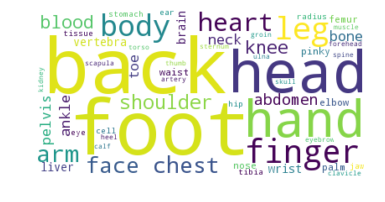


For cause: Struck By Moving Objects


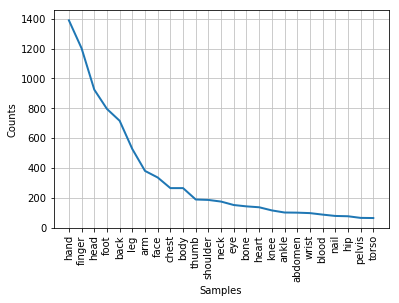

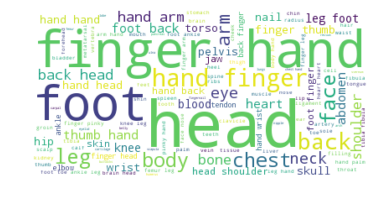


For cause: Suffocation


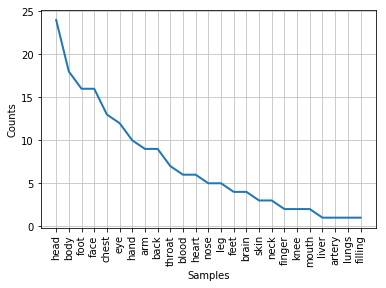

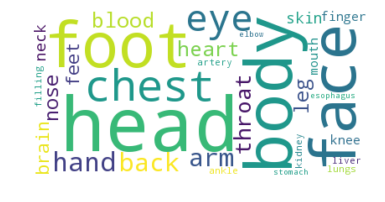

In [24]:
for cause in causes:
    parseCause(cause)

# Summary

 1. For body parts, we have the corpus. So it can be directly used here for information extraction.

 2. Some accidents do not have any body part inforamtion inside and they will be ignored for body parts analysis.
 
 3. "Hand" is the most prone to be injured during alomost all accident and should be taken care of. 